In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
demo = pd.read_csv('DEMO.csv')
mclass = pd.read_csv('MCLASS.csv')
txkea = pd.read_csv('TXKEA.csv')

/var/folders/9m/3m9g9yzs77j2m_79z47fjdr00000gq/T/ipykernel_72029/2206552592.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  demo = pd.read_csv('DEMO.csv')


In [3]:
demo.isna().sum()
#checking for nulls

student_id     0
district_id    0
ethnicity      0
eco            0
el             0
spec_ed        0
dtype: int64

In [4]:
mclass.isna().sum()
#check for nulls
#keep all rows because score is not very relevant given the information from the senario

student_id               0
district_id           6240
school_id             6592
assessment_edition       0
composite_level          0
composite_score       7144
dtype: int64

In [5]:
txkea.isna().sum()

district_id                0
student_id                 0
language                   0
lit_screening_benchmark    0
lit_screening_score        0
date                       0
dtype: int64

In [6]:
from pandasql import sqldf

In [7]:
query = 'select d.*, m.composite_level as mclass_lvl, m.composite_score as mclass_score, \
t.lit_screening_benchmark as txkea_level, t.lit_screening_score as txkea_score \
from demo as d \
left join mclass as m on d.student_id = m.student_id \
left join txkea as t on d.student_id = t.student_id \
where m.assessment_edition = \'DIBELS 8th Edition\' \
or t.language = \'English\';'

# this query makes a df of all students who took either the mclass or txkea tests in English, their scores,
# and some of their demographics

In [8]:
result = sqldf(query, locals())

In [9]:
result.head(1000)

,student_id,district_id,ethnicity,eco,el,spec_ed,mclass_lvl,mclass_score,txkea_level,txkea_score
0,885938600,53405,White,YES,NO,NO,None,NaN,On-Track,37.0
1,871944576,798403,Black or African American,YES,NO,NO,None,NaN,On-Track,21.0
2,818725252,53405,White,NO,NO,NO,None,NaN,On-Track,42.0
3,702015143,800409,White,YES,NO,YES,None,NaN,On-Track,19.0
4,717968813,48403,Two or more races,YES,NO,NO,None,NaN,On-Track,21.0
...,...,...,...,...,...,...,...,...,...,...
995,8855137252,808486,Black or African American,YES,NO,NO,None,NaN,On-Track,34.0
996,8855119496,858403,Hispanic/Latino,YES,NO,NO,None,NaN,On-Track,20.0
997,8855498655,801405,Hispanic/Latino,NO,NO,NO,Above Benchmark,332.0,None,NaN
998,8855427253,1407,Hispanic/Latino,YES,NO,YES,Below Benchmark,289.0,None,NaN


In [10]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150257 entries, 0 to 150256
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   student_id    150257 non-null  object 
 1   district_id   150257 non-null  int64  
 2   ethnicity     150257 non-null  object 
 3   eco           150257 non-null  object 
 4   el            150257 non-null  object 
 5   spec_ed       150257 non-null  object 
 6   mclass_lvl    56155 non-null   object 
 7   mclass_score  56149 non-null   float64
 8   txkea_level   94573 non-null   object 
 9   txkea_score   94573 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 11.5+ MB


# Data exploration and Analysis

## How many students took each test?


In [11]:
mclass_total = result[result['mclass_lvl'].notna()]
len(mclass_total)
# number of students that took mclass

56155

In [12]:
txkea_total = result[result['txkea_level'].notna()]
len(txkea_total)
#number of students that took txkea

94573

## How many students with each specifier took each assessment?

In [13]:
result.to_csv('clean_data.csv', index=False)
eco = result[result['eco'] == 'YES']

In [14]:
eco_mclass = eco[eco['mclass_lvl'].notna()]
len(eco_mclass)
#number of  eco dis students that took mclass test

33331

In [15]:
eco_txkea = eco[eco['txkea_level'].notna()]
len(eco_txkea)
#number of eco dis students that took txkea test

56100

In [16]:
el = result[result['el'] == 'YES']
el_mclass = el[el['mclass_lvl'].notna()]
el_txkea = el[el['txkea_level'].notna()]
#finding number of el students that took mclass and txkea


In [17]:
sped = result[result['spec_ed'] == 'YES']
sped_mclass =sped[sped['mclass_lvl'].notna()]
sped_txkea = sped[sped['txkea_level'].notna()]
#finding number of sped students that took mclass and txkea


In [18]:
graph = pd.DataFrame(
{ "mclass" : [len(sped_mclass), len(el_mclass), len(eco_mclass)],
 "txkea" : [len(sped_txkea), len(el_txkea), len(eco_txkea)]}, index = ['sped', 'el', 'eco'])
#creating dataframe to reflect values found

In [19]:
graph

,mclass,txkea
sped,4084,7220
el,7785,11879
eco,33331,56100


In [20]:
graph.mclass = round(graph.mclass/len(mclass), 3) * 100
graph.txkea = round(graph.txkea/len(txkea), 3) * 100
#turning numbers into proportions

In [21]:
graph

,mclass,txkea
sped,6.5,6.4
el,12.3,10.6
eco,52.7,50.1


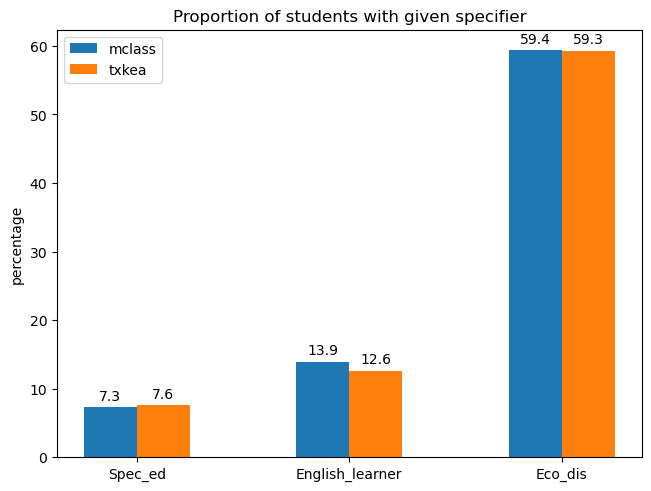

In [22]:
identifier = ("Spec_ed", "English_learner", "Eco_dis")
proportion = {
    'mclass': (7.3, 13.9, 59.4),
    'txkea': (7.6, 12.6, 59.3),
}

x = np.arange(len(identifier))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in proportion.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentage')
ax.set_title('Proportion of students with given specifier')
ax.set_xticks(x + .125, identifier)
ax.legend()


plt.show()

It appears that the proportion of special education students, English learning students, and Economically Disadvantaged students are almost equal across both assessments. This may suggest that these specifiers do not have an impact on the performance gap across assessments.

## How many students of each demographic took each assessment?

In [23]:
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(result['ethnicity'])):
    
    if result['ethnicity'][i] not in visited: 
        
        visited.append(result['ethnicity'][i])
          
        cnt += 1
  

In [24]:
cnt

7

In [25]:
visited

['White',
 'Black or African American',
 'Two or more races',
 'Hispanic/Latino',
 'American Indian or Alaska Nat',
 'Asian',
 'Native Hawaiian/Other Pacific']

In [26]:
eth_mclass = []
for i in visited:
    count = len(mclass_total[mclass_total['ethnicity'] == i])
    eth_mclass.append(count)

In [27]:
eth_txkea = []
for i in visited:
    count = len(txkea_total[txkea_total['ethnicity'] == i])
    eth_txkea.append(count)

In [28]:
ethnicity_graph = pd.DataFrame(
{ "mclass" : eth_mclass,
 "txkea" : eth_txkea}, index = [visited])

In [29]:
ethnicity_graph

,mclass,txkea
White,19995,30611
Black or African American,5248,13347
Two or more races,1885,3716
Hispanic/Latino,26657,42404
American Indian or Alaska Nat,170,263
Asian,2070,4116
Native Hawaiian/Other Pacific,130,116


In [30]:
ethnicity_graph.mclass = round(ethnicity_graph.mclass/len(mclass), 3) * 100
ethnicity_graph.txkea = round(ethnicity_graph.txkea/len(txkea), 3) * 100
#turning numbers into proportions

In [31]:
ethnicity_graph

,mclass,txkea
White,31.6,27.3
Black or African American,8.3,11.9
Two or more races,3.0,3.3
Hispanic/Latino,42.1,37.8
American Indian or Alaska Nat,0.3,0.2
Asian,3.3,3.7
Native Hawaiian/Other Pacific,0.2,0.1


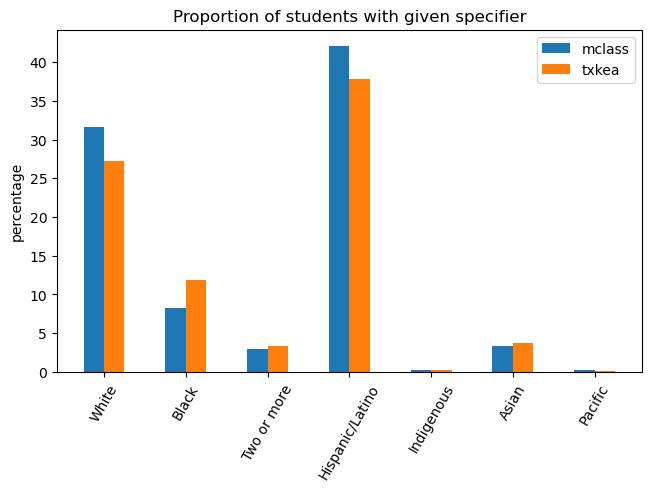

In [32]:
identifier = ('White',
 'Black',
 'Two or more',
 'Hispanic/Latino',
 'Indigenous',
 'Asian',
 'Pacific')
proportion = {
    'mclass': ethnicity_graph.mclass,
    'txkea': ethnicity_graph.txkea,
}

x = np.arange(len(identifier))  # the label locations
width = 0.25  # the width of the bars
multiplier = -.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in proportion.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
  
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentage')
ax.set_title('Proportion of students with given specifier')
ax.legend()
ax.set_xticks([0,1,2,3,4,5,6])
# Set the tick labels
ax.set_xticklabels(identifier)
plt.xticks(rotation = 60)
plt.show()


It appears that the racial proportions of each test are fairly similiar although the txkea test had a slightly higher proportion of Black students than the student that took the mclass.

In [33]:
mclass.district_id

0        806405.0
1        818408.0
2             NaN
3        820405.0
4        820407.0
           ...   
63263    778409.0
63264    801102.0
63265    858404.0
63266    858404.0
63267     93408.0
Name: district_id, Length: 63268, dtype: float64

In [34]:
result.district_id

0          53405
1         798403
2          53405
3         800409
4          48403
           ...  
150252     20401
150253     76408
150254     86485
150255    856408
150256    772408
Name: district_id, Length: 150257, dtype: int64

In [35]:
cnt = 0
  
# list to hold visited values
districts_mclass = []
  
# loop for counting the unique
# values in height
for i in range(0, len(mclass['district_id'])):
    
    if mclass['district_id'].iloc[i] not in districts_mclass: 
        
        districts_mclass.append(mclass['district_id'].iloc[i])
          
        cnt += 1
# for loop creates an array of district_ids from the mclass test

In [36]:
districts_mclass

[806405.0,
 818408.0,
 nan,
 820405.0,
 820407.0,
 818402.0,
 93408.0,
 870407.0,
 844408.0,
 801102.0,
 739405.0,
 760405.0,
 nan,
 58106.0,
 86172.0,
 874409.0,
 86136.0,
 874480.0,
 20401.0,
 nan,
 15408.0,
 83403.0,
 800402.0,
 51107.0,
 80407.0,
 770486.0,
 nan,
 86488.0,
 48483.0,
 48405.0,
 35407.0,
 nan,
 nan,
 819402.0,
 nan,
 891407.0,
 834488.0,
 708480.0,
 nan,
 873401.0,
 803407.0,
 nan,
 739402.0,
 19107.0,
 815407.0,
 826480.0,
 874406.0,
 844407.0,
 799403.0,
 820403.0,
 771408.0,
 47405.0,
 23409.0,
 32402.0,
 nan,
 848408.0,
 818406.0,
 821409.0,
 30408.0,
 778108.0,
 78407.0,
 833403.0,
 819407.0,
 801405.0,
 64408.0,
 nan,
 1407.0,
 nan,
 734403.0,
 60480.0,
 62488.0,
 nan,
 90407.0,
 772174.0,
 834404.0,
 83406.0,
 nan,
 802407.0,
 889408.0,
 86487.0,
 nan,
 872409.0,
 819409.0,
 872408.0,
 48401.0,
 nan,
 778487.0,
 nan,
 43403.0,
 783408.0,
 8407.0,
 795402.0,
 62160.0,
 795487.0,
 825408.0,
 819408.0,
 nan,
 875408.0,
 nan,
 855408.0,
 821101.0,
 nan,
 84406.0,


In [37]:
cnt = 0
  
# list to hold visited values
districts_txkea = []
  
# loop for counting the unique
# values in height
for i in range(0, len(txkea['district_id'])):
    
    if txkea['district_id'].iloc[i] not in districts_txkea: 
        
        districts_txkea.append(txkea['district_id'].iloc[i])
          
        cnt += 1

In [38]:
doubles = set(districts_mclass) & set(districts_txkea)
# checks for repeat values between the two lists of districts

In [39]:
len(doubles)

6

given that there are about 220 districts that administered both assessments, it would appear that the district a student took the test does not influence kindergarden readiness

In [40]:
import functions as f

/Users/HerrickW/codeup-data-science/tea_project/Data/functions.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  demo = pd.read_csv('DEMO.csv')


In [41]:
f.numberof_students()

There were 56155 students             that took the mclass assessment and 94573 students that took the txtea assessment.


In [42]:
f.assessment_specifier()

,mclass,txkea
sped,4084,7220
el,7785,11879
eco,33331,56100


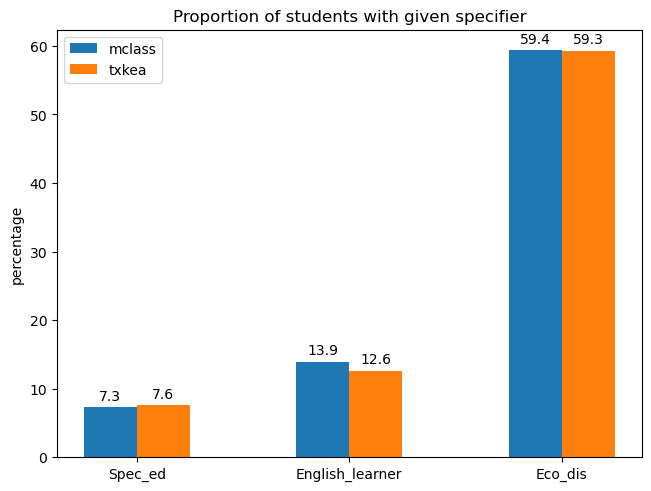

In [43]:
f.graph_specifier()

In [44]:
f.ethnicity_count()

,mclass,txkea
White,31.6,27.3
Black or African American,8.3,11.9
Two or more races,3.0,3.3
Hispanic/Latino,42.1,37.8
American Indian or Alaska Nat,0.3,0.2
Asian,3.3,3.7
Native Hawaiian/Other Pacific,0.2,0.1


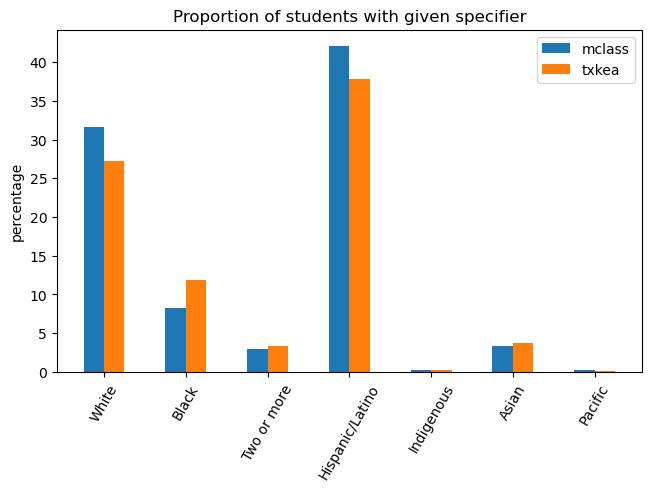

In [45]:
f.ethnicity_graph()

/Users/HerrickW/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spec_ed', ylabel='count'>

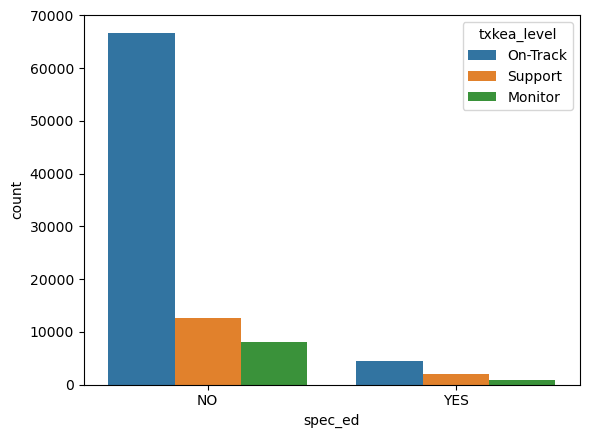

In [51]:
sns.countplot(result.spec_ed, hue = result.txkea_level)

In [ ]:
w